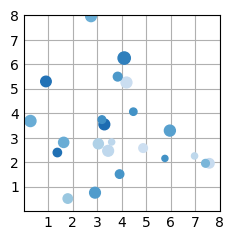

In [6]:
# initial test to ensure that my notebook is working properly
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('_mpl-gallery')

# a new comment
# make the data
np.random.seed(3)
x = 4 + np.random.normal(0, 2, 24)
y = 4 + np.random.normal(0, 2, len(x))
# size and color:
sizes = np.random.uniform(15, 80, len(x))
colors = np.random.uniform(15, 80, len(x))

# plot
fig, ax = plt.subplots()

ax.scatter(x, y, s=sizes, c=colors, vmin=0, vmax=100)

ax.set(xlim=(0, 8), xticks=np.arange(1, 9),
       ylim=(0, 8), yticks=np.arange(1, 9))

plt.show()

In [7]:
# Setting up with necessary imports
import numpy as np
import pandas as pd #the csv reading library
import matplotlib.pyplot as plt #the ploting library
import glob #to get file names
from pandas import Series
import seaborn as sns
from sklearn.linear_model  import LinearRegression
from math import sin, cos, sqrt, atan2, radians
#import cmocean.cm as cmo

In [8]:
df = pd.read_csv('../Data/NASA MUREP/Spectral CDOM Repos and CSVs/CDOM_Absorp.csv', sep=',')
df

,event,station,date,time,lon,lat,Pmax,Wavelength,ag_5m,ag_10m,...,ag_35m,ag_50m,ag_60m,ag_75m,ag_95m,ag_100m,ag_125m,ag_200m,ag_500m,ag_1500m
0,701508,CTD_03,20080310,1508,-38.555000,-50.731667,500,250,8.81E-01,nd,...,8.88E-01,8.58E-01,8.28E-01,nd,nd,nd,nd,nd,6.24E-01,nd
1,701508,CTD_03,20080310,1508,-38.555000,-50.731667,500,251,8.58E-01,nd,...,8.64E-01,8.34E-01,8.04E-01,nd,nd,nd,nd,nd,5.94E-01,nd
2,701508,CTD_03,20080310,1508,-38.555000,-50.731667,500,252,8.37E-01,nd,...,8.45E-01,8.13E-01,7.84E-01,nd,nd,nd,nd,nd,5.71E-01,nd
3,701508,CTD_03,20080310,1508,-38.555000,-50.731667,500,253,8.19E-01,nd,...,8.26E-01,7.94E-01,7.66E-01,nd,nd,nd,nd,nd,5.49E-01,nd
4,701508,CTD_03,20080310,1508,-38.555000,-50.731667,500,254,8.02E-01,nd,...,8.10E-01,7.77E-01,7.49E-01,nd,nd,nd,nd,nd,5.31E-01,nd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13585,960100,CTD_51,20080405,103,-37.406667,-51.465000,200,698,1.19E-04,1.09E-04,...,nd,1.59E-04,nd,nd,nd,6.46E-05,nd,nd,nd,nd
13586,960100,CTD_51,20080405,103,-37.406667,-51.465000,200,699,4.08E-05,3.43E-05,...,nd,5.76E-05,nd,nd,nd,1.41E-05,nd,nd,nd,nd
13587,960100,CTD_51,20080405,103,-37.406667,-51.465000,200,700,0.00E+00,0.00E+00,...,nd,0.00E+00,nd,nd,nd,0.00E+00,nd,nd,nd,nd
13588,960100,CTD_51,20080405,103,-37.406667,-51.465000,200,Slopes,1.57E-02,1.55E-02,...,nd,1.54E-02,nd,nd,nd,1.76E-02,nd,nd,nd,nd


      Wavelength    ag_35m
0            250  8.88E-01
1            251  8.64E-01
2            252  8.45E-01
3            253  8.26E-01
4            254  8.10E-01
...          ...       ...
13585        698        nd
13586        699        nd
13587        700        nd
13588     Slopes        nd
13589      a_440        nd

[13590 rows x 2 columns]
      Wavelength    ag_35m
0            250  8.88E-01
1            251  8.64E-01
2            252  8.45E-01
3            253  8.26E-01
4            254  8.10E-01
...          ...       ...
13585        698       NaN
13586        699       NaN
13587        700       NaN
13588        NaN       NaN
13589        NaN       NaN

[13590 rows x 2 columns]
       Wavelength    ag_35m
0           250.0  0.888000
1           251.0  0.864000
2           252.0  0.845000
3           253.0  0.826000
4           254.0  0.810000
...           ...       ...
12677       696.0  0.000294
12678       697.0  0.000331
12679       698.0  0.000282
12680       699.0  0

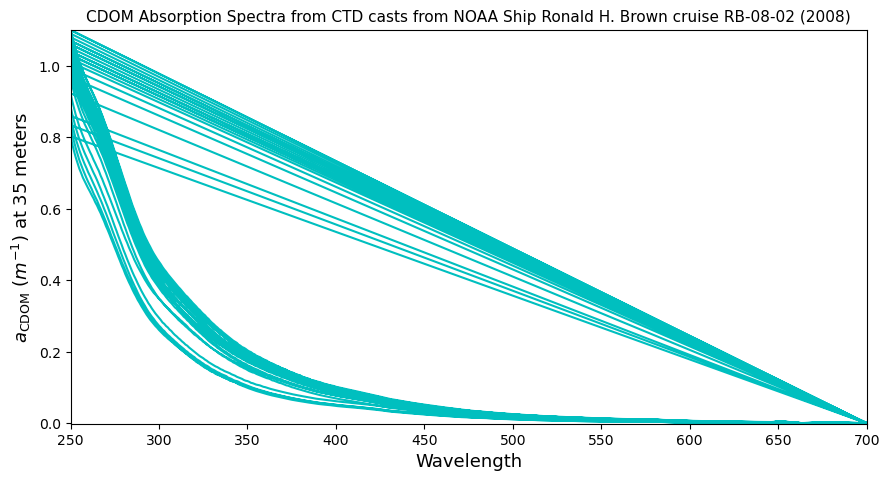

In [1]:
# setting up an empty figure which I can import data into later (testing that all functions are working properly)
# importing example csv
import numpy as np
import pandas as pd #the csv reading library
import matplotlib.pyplot as plt #the plotting library
import glob #to get file names
from pandas import Series
import seaborn as sns
from sklearn.linear_model import LinearRegression
from math import sin, cos, sqrt, atan2, radians
#import cmocean.cm as cmo



df = pd.read_csv('../Data/NASA MUREP/Spectral CDOM Repos and CSVs/CDOM_Absorp.csv', sep=',')
rawdata = df[["Wavelength","ag_35m"]]  #df.loc['250':'700', ['Wavelength', 'ag_35m']]
print(rawdata)
data = rawdata.replace(r'^([A-Za-z])', np.NaN, regex=True)
print(data)
data.dropna(inplace=True)

data=data.astype({'Wavelength':'float'})
data=data.astype({'ag_35m':'float'})

print(data)

fig = plt.figure(figsize=(9,9))
ax = fig.add_subplot(212) # What does this mean?
ax.set_xlabel('Wavelength', fontsize=13)
ax.set_ylabel('$a_{\mathrm{CDOM}}$ ($m^{-1}$) at 35 meters', fontsize=13) # What does this mean?
ax.set_title('CDOM Absorption Spectra from CTD casts from NOAA Ship Ronald H. Brown cruise RB-08-02 (2008)', fontsize=11)
# TODO - find a correct dataset that contains similar values
plt.grid(False)

x = data['Wavelength']
y = data['ag_35m']
print(x,y)

xmin = np.min(x)
xmax = np.max(x)
ymin = np.min(y)
ymax = np.max(y)

num_ticks = 10
x_ticks_positions = np.linspace(xmin, xmax, num_ticks)

# Create a list of x-axis tick labels starting from the second tick position
# Adjust the format as needed (e.g., '{:.1f}' for one decimal place)
x_ticks_labels = ['{:.0f}'.format(tick) for tick in x_ticks_positions]
ax.set_xticks(x_ticks_positions)
ax.set_xticklabels(x_ticks_labels)

print(xmin,xmax,ymin,ymax)
ax.set_ylim(ymin, ymax)
ax.set_xlim(xmin, xmax)


plt.tight_layout()
plt.plot(x, y,'c-')

      Wavelength    ag_50m
0            250  8.58E-01
1            251  8.34E-01
2            252  8.13E-01
3            253  7.94E-01
4            254  7.77E-01
...          ...       ...
13585        698  1.59E-04
13586        699  5.76E-05
13587        700  0.00E+00
13588     Slopes  1.54E-02
13589      a_440  4.67E-02

[13590 rows x 2 columns]
      Wavelength    ag_50m
0            250  8.58E-01
1            251  8.34E-01
2            252  8.13E-01
3            253  7.94E-01
4            254  7.77E-01
...          ...       ...
13585        698  1.59E-04
13586        699  5.76E-05
13587        700  0.00E+00
13588        NaN  1.54E-02
13589        NaN  4.67E-02

[13590 rows x 2 columns]
       Wavelength    ag_50m
0           250.0  0.858000
1           251.0  0.834000
2           252.0  0.813000
3           253.0  0.794000
4           254.0  0.777000
...           ...       ...
13583       696.0  0.000354
13584       697.0  0.000264
13585       698.0  0.000159
13586       699.0  0

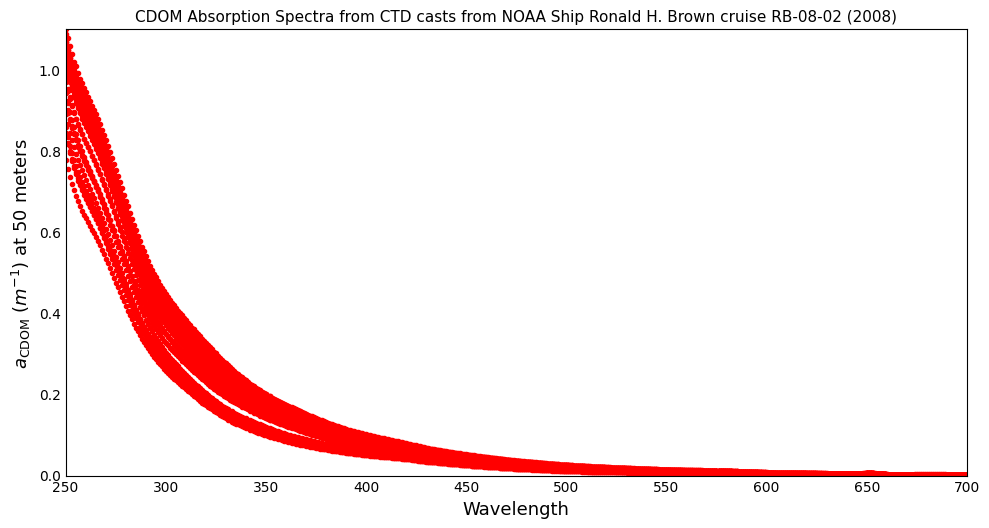

In [10]:
# setting up an empty figure which I can import data into later (testing that all functions are working properly)
# importing example csv
import pandas as pd #the csv reading library
import matplotlib.pyplot as plt #the plotting library
import glob #to get file names
from pandas import Series
import seaborn as sns
from sklearn.linear_model import LinearRegression
from math import sin, cos, sqrt, atan2, radians
#import cmocean.cm as cmo
import numpy as np


df = pd.read_csv('../Data/NASA MUREP/Spectral CDOM Repos and CSVs/CDOM_Absorp.csv', sep=',')
rawdata = df[["Wavelength","ag_50m"]]  #df.loc['250':'700', ['Wavelength', 'ag_50m']]
print(rawdata)
data = rawdata.replace(r'^([A-Za-z])', np.NaN, regex=True)
print(data)
data.dropna(inplace=True)

data=data.astype({'Wavelength':'float'})
data=data.astype({'ag_50m':'float'})

print(data)

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(212) # What does this mean?
ax.set_xlabel('Wavelength', fontsize=13)
ax.set_ylabel('$a_{\mathrm{CDOM}}$ ($m^{-1}$) at 50 meters', fontsize=13) # What does this mean?
ax.set_title('CDOM Absorption Spectra from CTD casts from NOAA Ship Ronald H. Brown cruise RB-08-02 (2008)', fontsize=11)
# TODO - find a correct dataset that contains similar values
plt.grid(False)

x = data['Wavelength']
y = data['ag_50m']
print(x,y)

xmin = np.min(x)
xmax = np.max(x)
ymin = np.min(y)
ymax = np.max(y)

num_ticks = 10
x_ticks_positions = np.linspace(xmin, xmax, num_ticks)

# Create a list of x-axis tick labels starting from the second tick position
# Adjust the format as needed (e.g., '{:.1f}' for one decimal place)
x_ticks_labels = ['{:.0f}'.format(tick) for tick in x_ticks_positions]
ax.set_xticks(x_ticks_positions)
ax.set_xticklabels(x_ticks_labels)

print(xmin,xmax,ymin,ymax)
ax.set_ylim(ymin, ymax)
ax.set_xlim(xmin, xmax)


plt.tight_layout()
plt.plot(x, y,'r.')

c:\Users\byrub\OneDrive\Documents\GitHub\MUREP-In-Progress-Notebooks
      Wavelength    ag_60m
0            250  8.28E-01
1            251  8.04E-01
2            252  7.84E-01
3            253  7.66E-01
4            254  7.49E-01
...          ...       ...
13585        698        nd
13586        699        nd
13587        700        nd
13588     Slopes        nd
13589      a_440        nd

[13590 rows x 2 columns]
      Wavelength    ag_60m
0            250  8.28E-01
1            251  8.04E-01
2            252  7.84E-01
3            253  7.66E-01
4            254  7.49E-01
...          ...       ...
13585        698       NaN
13586        699       NaN
13587        700       NaN
13588        NaN       NaN
13589        NaN       NaN

[13590 rows x 2 columns]
       Wavelength    ag_60m
0           250.0  0.828000
1           251.0  0.804000
2           252.0  0.784000
3           253.0  0.766000
4           254.0  0.749000
...           ...       ...
12677       696.0  0.000341
12678  

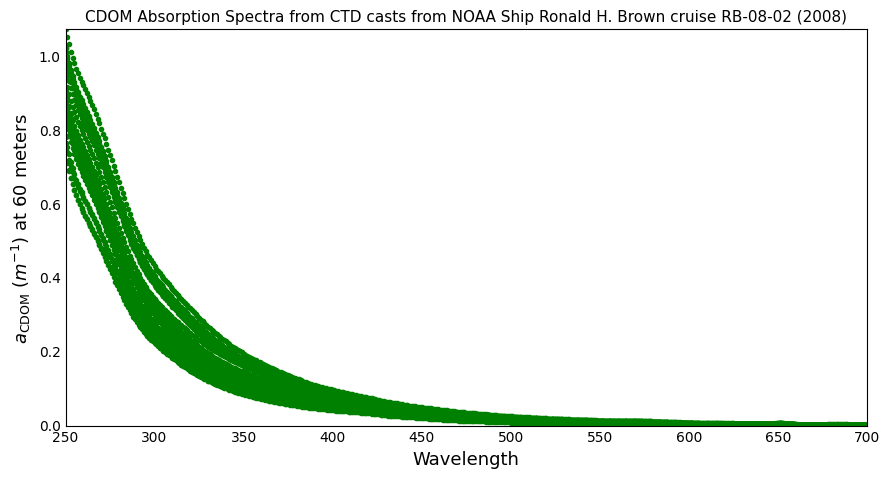

In [11]:
# setting up an empty figure which I can import data into later (testing that all functions are working properly)
# importing example csv
import numpy as np
import pandas as pd #the csv reading library
import matplotlib.pyplot as plt #the plotting library
import glob #to get file names
import os
from pandas import Series
import seaborn as sns
from sklearn.linear_model import LinearRegression
from math import sin, cos, sqrt, atan2, radians
#import cmocean.cm as cmo
# get the current working directory
current_working_directory = os.getcwd()

# print output to the console
print(current_working_directory)

df = pd.read_csv('../Data/NASA MUREP/Spectral CDOM Repos and CSVs/CDOM_Absorp.csv', sep=',')
rawdata = df[["Wavelength","ag_60m"]]  #df.loc['250':'700', ['Wavelength', 'ag_60m']]
print(rawdata)
data = rawdata.replace(r'^([A-Za-z])', np.NaN, regex=True)
print(data)
data.dropna(inplace=True)

data=data.astype({'Wavelength':'float'})
data=data.astype({'ag_60m':'float'})

print(data)

fig = plt.figure(figsize=(9,9))
ax = fig.add_subplot(212) # What does this mean?
ax.set_xlabel('Wavelength', fontsize=13)
ax.set_ylabel('$a_{\mathrm{CDOM}}$ ($m^{-1}$) at 60 meters', fontsize=13) # What does this mean?
ax.set_title('CDOM Absorption Spectra from CTD casts from NOAA Ship Ronald H. Brown cruise RB-08-02 (2008)', fontsize=11)
# TODO - find a correct dataset that contains similar values
plt.grid(False)

x = data['Wavelength']
y = data['ag_60m']
print(x,y)

xmin = np.min(x)
xmax = np.max(x)
ymin = np.min(y)
ymax = np.max(y)

num_ticks = 10
x_ticks_positions = np.linspace(xmin, xmax, num_ticks)

# Create a list of x-axis tick labels starting from the second tick position
# Adjust the format as needed (e.g., '{:.1f}' for one decimal place)
x_ticks_labels = ['{:.0f}'.format(tick) for tick in x_ticks_positions]
ax.set_xticks(x_ticks_positions)
ax.set_xticklabels(x_ticks_labels)

print(xmin,xmax,ymin,ymax)
ax.set_ylim(ymin, ymax)
ax.set_xlim(xmin, xmax)


plt.tight_layout()
plt.plot(x, y,'g.')

      Wavelength   ag_500m
0            250  6.24E-01
1            251  5.94E-01
2            252  5.71E-01
3            253  5.49E-01
4            254  5.31E-01
...          ...       ...
13585        698        nd
13586        699        nd
13587        700        nd
13588     Slopes        nd
13589      a_440        nd

[13590 rows x 2 columns]
      Wavelength   ag_500m
0            250  6.24E-01
1            251  5.94E-01
2            252  5.71E-01
3            253  5.49E-01
4            254  5.31E-01
...          ...       ...
13585        698       NaN
13586        699       NaN
13587        700       NaN
13588        NaN       NaN
13589        NaN       NaN

[13590 rows x 2 columns]
      Wavelength   ag_500m
0          250.0  0.624000
1          251.0  0.594000
2          252.0  0.571000
3          253.0  0.549000
4          254.0  0.531000
...          ...       ...
1352       696.0  0.000165
1353       697.0  0.000140
1354       698.0  0.000088
1355       699.0  0.000022
135

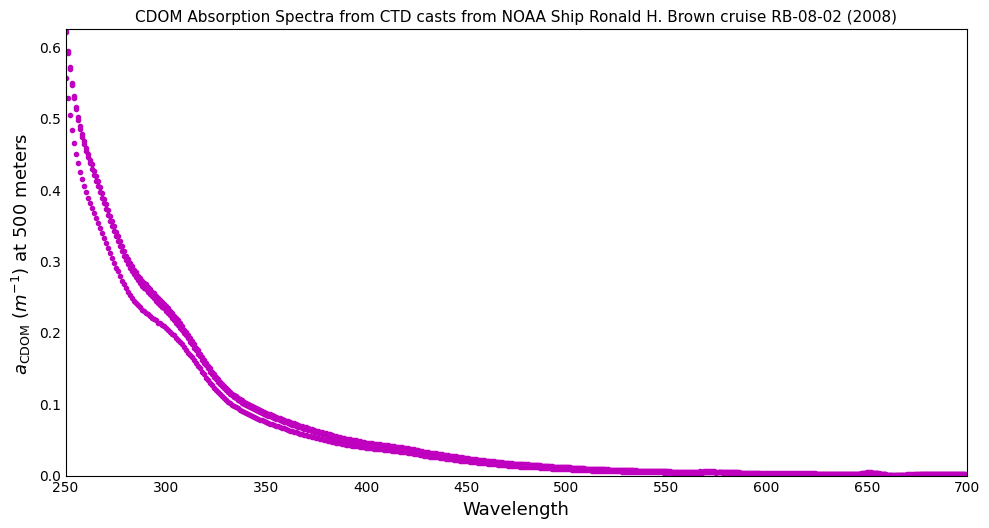

In [12]:
# setting up an empty figure which I can import data into later (testing that all functions are working properly)
# importing example csv
import numpy as np
import pandas as pd #the csv reading library
import matplotlib.pyplot as plt #the plotting library
import glob #to get file names
from pandas import Series
import seaborn as sns
from sklearn.linear_model import LinearRegression
from math import sin, cos, sqrt, atan2, radians
#import cmocean.cm as cmo



df = pd.read_csv('../Data/NASA MUREP/Spectral CDOM Repos and CSVs/CDOM_Absorp.csv', sep=',')
rawdata = df[["Wavelength","ag_500m"]]  #df.loc['250':'700', ['Wavelength', 'ag_500m']]
print(rawdata)
data = rawdata.replace(r'^([A-Za-z])', np.NaN, regex=True)
print(data)
data.dropna(inplace=True)

data=data.astype({'Wavelength':'float'})
data=data.astype({'ag_500m':'float'})

print(data)

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(212) # What does this mean?
ax.set_xlabel('Wavelength', fontsize=13)
ax.set_ylabel('$a_{\mathrm{CDOM}}$ ($m^{-1}$) at 500 meters', fontsize=13) # What does this mean?
ax.set_title('CDOM Absorption Spectra from CTD casts from NOAA Ship Ronald H. Brown cruise RB-08-02 (2008)', fontsize=11)
# TODO - find a correct dataset that contains similar values
plt.grid(False)

x = data['Wavelength']
y = data['ag_500m']
print(x,y)

xmin = np.min(x)
xmax = np.max(x)
ymin = np.min(y)
ymax = np.max(y)

num_ticks = 10
x_ticks_positions = np.linspace(xmin, xmax, num_ticks)

# Create a list of x-axis tick labels starting from the second tick position
# Adjust the format as needed (e.g., '{:.1f}' for one decimal place)
x_ticks_labels = ['{:.0f}'.format(tick) for tick in x_ticks_positions]
ax.set_xticks(x_ticks_positions)
ax.set_xticklabels(x_ticks_labels)

print(xmin,xmax,ymin,ymax)
ax.set_ylim(ymin, ymax)
ax.set_xlim(xmin, xmax)


plt.tight_layout()
plt.plot(x, y,'m.')